Importing necessary libraries

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import joblib 

Reading Dataset

In [4]:
df = pd.read_csv("C:/Users/cnama/Desktop/IIPGH_project/players_21.csv")
df

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,103500000.0,560000.0,33,...,52+3,52+3,52+3,62+3,19+3,https://cdn.sofifa.net/players/158/023/21_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",92,92,63000000.0,220000.0,35,...,54+3,54+3,54+3,61+3,20+3,https://cdn.sofifa.net/players/020/801/21_120.png,https://cdn.sofifa.net/teams/45/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
2,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,91,91,111000000.0,240000.0,31,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/21_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,NaN,https://cdn.sofifa.net/flags/pl.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,132000000.0,270000.0,28,...,49+3,49+3,49+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/21_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CAM, CM",91,91,129000000.0,370000.0,29,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/21_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,257710,https://sofifa.com/player/257710/mengxuan-zhan...,Zhang Mengxuan,张梦炫,CB,47,52,70000.0,1000.0,21,...,47+2,47+2,47+2,45+2,15+2,https://cdn.sofifa.net/players/257/710/21_120.png,https://cdn.sofifa.net/teams/112165/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
18940,257933,https://sofifa.com/player/257933/wenzhuo-huang...,Huang Wenzhou,黄文卓,CM,47,53,70000.0,1000.0,21,...,46+2,46+2,46+2,47+2,15+2,https://cdn.sofifa.net/players/257/933/21_120.png,https://cdn.sofifa.net/teams/112540/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
18941,257936,https://sofifa.com/player/257936/yue-song/210002,Song Yue,宋岳,CM,47,47,45000.0,2000.0,28,...,46+1,46+1,46+1,47,11+2,https://cdn.sofifa.net/players/257/936/21_120.png,https://cdn.sofifa.net/teams/111774/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
18942,258736,https://sofifa.com/player/258736/vani-da-silva...,V. Da Silva,Ivanilson Loforte Tique Da Silva,ST,47,67,130000.0,500.0,17,...,26+2,26+2,26+2,33+2,14+2,https://cdn.sofifa.net/players/258/736/21_120.png,https://cdn.sofifa.net/teams/1920/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/gb-eng.png


Exploratory Data Analysis

#dropping the columns that are object columns 

object_columns = df.select_dtypes(include=['object']).columns
object_columns

In [5]:
#checking the size of the dataset
df.shape

(18944, 110)

In [6]:
#checking for the columns in the dataset
df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)

In [7]:
#dropping columns which we do not need for the analysis 
df = df.drop(['sofifa_id', 'player_url', 'long_name', 'player_face_url', 'club_logo_url', 'club_flag_url', 'nation_logo_url', 'nation_flag_url', 'dob', 'club_team_id', 'club_jersey_number', 'club_loaned_from', 'club_joined', 'nationality_id', 'nationality_name', 'nation_team_id', 'nation_jersey_number', 'real_face', 'short_name', 'player_positions', 'potential', 'age', 'height_cm', 'weight_kg', 'club_name', 'league_name', 'league_level', 'club_contract_valid_until', 'nation_position', 'preferred_foot', 'weak_foot', 'international_reputation', 'work_rate', 'body_type', 'release_clause_eur', 'player_tags', 'player_traits', 'physic'], axis=1)
df

,overall,value_eur,wage_eur,club_position,skill_moves,pace,shooting,passing,dribbling,defending,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,93,103500000.0,560000.0,CAM,4,85.0,92.0,91.0,95.0,38.0,...,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,19+3
1,92,63000000.0,220000.0,LS,5,89.0,93.0,81.0,89.0,35.0,...,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,20+3
2,91,111000000.0,240000.0,ST,4,78.0,91.0,78.0,85.0,43.0,...,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3
3,91,132000000.0,270000.0,LW,5,91.0,85.0,86.0,94.0,36.0,...,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3,20+3
4,91,129000000.0,370000.0,RCM,4,76.0,86.0,93.0,88.0,64.0,...,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,47,70000.0,1000.0,SUB,2,58.0,23.0,26.0,27.0,50.0,...,41+2,41+2,41+2,42+2,45+2,47+2,47+2,47+2,45+2,15+2
18940,47,70000.0,1000.0,RES,2,58.0,32.0,49.0,47.0,43.0,...,48+2,48+2,48+2,47+2,47+2,46+2,46+2,46+2,47+2,15+2
18941,47,45000.0,2000.0,RES,2,65.0,37.0,49.0,46.0,40.0,...,47,47,47,47,47,46+1,46+1,46+1,47,11+2
18942,47,130000.0,500.0,SUB,2,70.0,46.0,40.0,53.0,16.0,...,32+2,32+2,32+2,35+2,33+2,26+2,26+2,26+2,33+2,14+2


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
overall,18944.0,6.567779e+01,7.002278e+00,47.0,61.00,66.0,70.0,93.0
value_eur,18707.0,2.902288e+06,7.743775e+06,9000.0,475000.00,975000.0,2000000.0,185500000.0
wage_eur,18719.0,9.148483e+03,1.989315e+04,500.0,1000.00,3000.0,8000.0,560000.0
skill_moves,18944.0,2.363017e+00,7.664689e-01,1.0,2.00,2.0,3.0,5.0
pace,16861.0,6.766811e+01,1.098486e+01,25.0,62.00,68.0,75.0,96.0
shooting,16861.0,5.227495e+01,1.399142e+01,16.0,42.00,54.0,63.0,93.0
passing,16861.0,5.713943e+01,1.027366e+01,25.0,50.00,58.0,64.0,93.0
dribbling,16861.0,6.245543e+01,1.004871e+01,25.0,57.00,64.0,69.0,95.0
defending,16861.0,5.131629e+01,1.640518e+01,15.0,36.00,56.0,64.0,91.0
attacking_crossing,18944.0,4.961286e+01,1.815306e+01,6.0,38.00,54.0,63.0,94.0


In [9]:
df.columns

Index(['overall', 'value_eur', 'wage_eur', 'club_position', 'skill_moves',
       'pace', 'shooting', 'passing', 'dribbling', 'defending',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_refle

Cleaning the Dataset

In [10]:
#converting the columns having the + sign to just numerical

for i in df.columns:
    if df[i].astype(str).str.contains(r'\+').any():
        df[i] = df[i].str.split('+').str[0]
        df[i] = pd.to_numeric(df[i], errors='coerce')

In [11]:
#checking the features that are object datatypes
df.columns[df.dtypes == 'object']

Index(['club_position', 'lw', 'lf', 'cf', 'rf', 'rw'], dtype='object')

In [12]:
#converting the object columns above that are supposed to be numeric to numeric 
a = ['lw', 'lf', 'cf', 'rf', 'rw']
for i in a:
    df[i] = pd.to_numeric(df[i], errors='coerce')

In [13]:
#rechecking if there are still object features 
df.columns[df.dtypes == 'object']

Index(['club_position'], dtype='object')

In [14]:
#checking for null values in the dataset 
df.isnull().sum()

overall            0
value_eur        237
wage_eur         225
club_position    225
skill_moves        0
                ... 
lcb              174
cb               174
rcb              174
rb                76
gk                 0
Length: 72, dtype: int64

In [15]:
df = df.dropna(subset=['club_position'])

In [16]:
df.shape

(18719, 72)

In [17]:
#filling all null cells with the mean of that column 

# Assuming df is your DataFrame with null values
columns = df.columns

# Separate numerical columns and 'club_position'
numerical_columns = df.select_dtypes(include=['number']).columns
categorical_columns = ['club_position']

# Extract 'club_position' column
club_position_column = df[categorical_columns]

# Drop 'club_position' from the DataFrame for imputation
df_numeric = df.drop(categorical_columns, axis=1)

# Apply SimpleImputer to the numerical columns
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(df_numeric)
df = pd.DataFrame(imputed_data, columns=numerical_columns)

# Add 'club_position' back to the DataFrame
df['club_position'] = club_position_column

# Display the resulting DataFrame
df.head()


,overall,value_eur,wage_eur,skill_moves,pace,shooting,passing,dribbling,defending,attacking_crossing,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,club_position
0,93.0,103500000.0,560000.0,4.0,85.0,92.0,91.0,95.0,38.0,85.0,...,65.0,65.0,66.0,62.0,52.0,52.0,52.0,62.0,19.0,CAM
1,92.0,63000000.0,220000.0,5.0,89.0,93.0,81.0,89.0,35.0,84.0,...,61.0,61.0,65.0,61.0,54.0,54.0,54.0,61.0,20.0,LS
2,91.0,111000000.0,240000.0,4.0,78.0,91.0,78.0,85.0,43.0,71.0,...,65.0,65.0,64.0,61.0,60.0,60.0,60.0,61.0,19.0,ST
3,91.0,132000000.0,270000.0,5.0,91.0,85.0,86.0,94.0,36.0,85.0,...,62.0,62.0,67.0,62.0,49.0,49.0,49.0,62.0,20.0,LW
4,91.0,129000000.0,370000.0,4.0,76.0,86.0,93.0,88.0,64.0,94.0,...,80.0,80.0,79.0,75.0,69.0,69.0,69.0,75.0,21.0,RCM


In [18]:
#rechecking to see if there are still any null values 
df.isnull().sum()

overall            0
value_eur          0
wage_eur           0
skill_moves        0
pace               0
                ... 
cb                 0
rcb                0
rb                 0
gk                 0
club_position    225
Length: 72, dtype: int64

Reducing our features:

finding the average of similar features and categories and grouping them

In [19]:
df.columns

Index(['overall', 'value_eur', 'wage_eur', 'skill_moves', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed

In [20]:
midfield_abilities = ['rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm']
defending_abilities = ['defending', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle']
attacking_abilities = ['attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf']
skill_abilities = ['skill_moves', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control']
movement_abilities = ['movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance']
power_abilities = ['power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots']
mentality_abilities = ['mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure']

In [21]:
#finding the average of the similar features

def calculate_average_features(data, feature_list, prefix):
    data[f'average_{prefix}_features'] = data[feature_list].mean(axis=1).astype(int)
    data.drop(feature_list, axis=1, inplace=True)


# Call the function for each set of features
calculate_average_features(df, attacking_abilities, 'attacking_ability')
calculate_average_features(df, skill_abilities, 'skill_ability')
calculate_average_features(df, movement_abilities, 'movement_ability')
calculate_average_features(df, power_abilities, 'power_ability')
calculate_average_features(df, mentality_abilities, 'mentality_ability')
calculate_average_features(df, midfield_abilities, 'midfield_ability')
calculate_average_features(df, defending_abilities, 'defending_ability')



Visualizing The Dataset

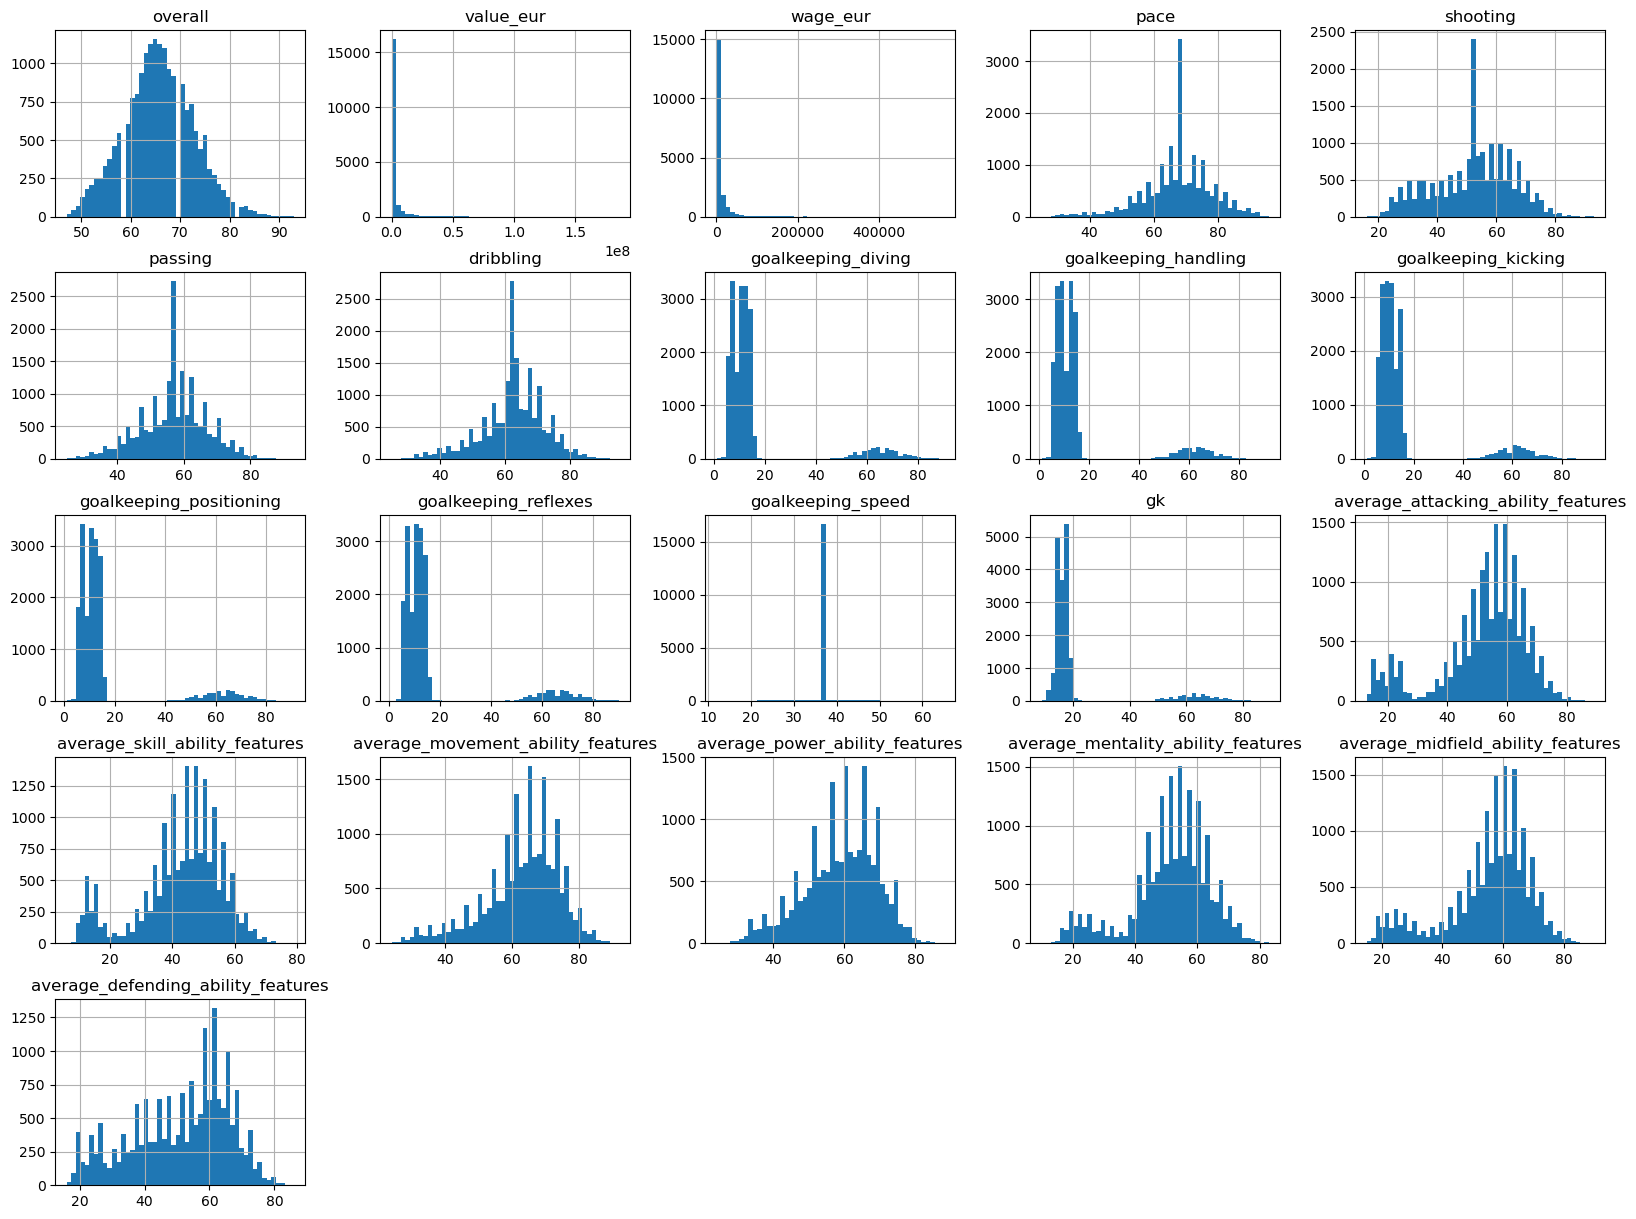

In [22]:
#checking the distribution of the features

df.hist(bins=50, figsize=(20,15));

In [23]:
df

,overall,value_eur,wage_eur,pace,shooting,passing,dribbling,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,...,goalkeeping_speed,gk,club_position,average_attacking_ability_features,average_skill_ability_features,average_movement_ability_features,average_power_ability_features,average_mentality_ability_features,average_midfield_ability_features,average_defending_ability_features
0,93.0,103500000.0,560000.0,85.0,92.0,91.0,95.0,6.0,11.0,15.0,...,37.156357,19.0,CAM,88,79,90,77,73,90,52
1,92.0,63000000.0,220000.0,89.0,93.0,81.0,89.0,7.0,11.0,15.0,...,37.156357,20.0,LS,89,69,86,88,74,85,51
2,91.0,111000000.0,240000.0,78.0,91.0,78.0,85.0,15.0,6.0,12.0,...,37.156357,19.0,ST,86,68,81,84,79,82,54
3,91.0,132000000.0,270000.0,91.0,85.0,86.0,94.0,9.0,9.0,15.0,...,37.156357,20.0,LW,84,75,90,71,74,87,51
4,91.0,129000000.0,370000.0,76.0,86.0,93.0,88.0,15.0,13.0,5.0,...,37.156357,21.0,RCM,84,74,79,81,83,88,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18714,47.0,70000.0,1000.0,58.0,23.0,26.0,27.0,12.0,13.0,8.0,...,37.156357,15.0,SUB,29,18,55,44,36,30,45
18715,47.0,70000.0,1000.0,58.0,32.0,49.0,47.0,8.0,8.0,13.0,...,37.156357,15.0,RES,41,35,58,42,42,46,46
18716,47.0,45000.0,2000.0,65.0,37.0,49.0,46.0,8.0,5.0,11.0,...,37.156357,11.0,RES,44,36,57,51,42,49,45
18717,47.0,130000.0,500.0,70.0,46.0,40.0,53.0,11.0,13.0,9.0,...,37.156357,14.0,SUB,44,35,67,46,38,46,26


In [24]:
df = df.dropna()

In [25]:
df.isnull().sum()

overall                               0
value_eur                             0
wage_eur                              0
pace                                  0
shooting                              0
passing                               0
dribbling                             0
goalkeeping_diving                    0
goalkeeping_handling                  0
goalkeeping_kicking                   0
goalkeeping_positioning               0
goalkeeping_reflexes                  0
goalkeeping_speed                     0
gk                                    0
club_position                         0
average_attacking_ability_features    0
average_skill_ability_features        0
average_movement_ability_features     0
average_power_ability_features        0
average_mentality_ability_features    0
average_midfield_ability_features     0
average_defending_ability_features    0
dtype: int64

In [26]:
#checking to see the effect of each feature on the label

df.corr()['overall'].sort_values(ascending=False) 

overall                               1.000000
passing                               0.662997
dribbling                             0.598680
wage_eur                              0.592008
average_power_ability_features        0.576564
value_eur                             0.559134
average_mentality_ability_features    0.554588
average_midfield_ability_features     0.501732
average_attacking_ability_features    0.469067
average_skill_ability_features        0.463460
shooting                              0.456197
average_defending_ability_features    0.404361
average_movement_ability_features     0.359855
pace                                  0.189750
goalkeeping_speed                     0.180761
gk                                    0.061117
goalkeeping_positioning               0.010672
goalkeeping_reflexes                  0.002776
goalkeeping_handling                  0.002059
goalkeeping_diving                    0.001757
goalkeeping_kicking                  -0.002386
Name: overall

**Splitting our dataset into goalkeepers and players datasets:**

this is mainly because the goalkeepers have some special features which could cause biasness when used to train the non-goalkeepers

In [27]:
#creating a goalkeepers dataset

goalkeepers = df.loc[df['club_position'] == 'GK']
goalkeepers

,overall,value_eur,wage_eur,pace,shooting,passing,dribbling,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,...,goalkeeping_speed,gk,club_position,average_attacking_ability_features,average_skill_ability_features,average_movement_ability_features,average_power_ability_features,average_mentality_ability_features,average_midfield_ability_features,average_defending_ability_features
5,91.0,120000000.0,125000.0,67.660686,52.24121,57.096064,62.433517,87.0,92.0,78.0,...,52.000000,89.0,GK,27,18,61,53,34,36,31
6,90.0,110000000.0,260000.0,67.660686,52.24121,57.096064,62.433517,88.0,85.0,88.0,...,45.000000,88.0,GK,30,24,50,53,40,41,32
10,90.0,102000000.0,160000.0,67.660686,52.24121,57.096064,62.433517,86.0,88.0,85.0,...,51.000000,88.0,GK,30,23,53,48,34,39,29
15,89.0,17500000.0,130000.0,67.660686,52.24121,57.096064,62.433517,87.0,87.0,91.0,...,57.000000,87.0,GK,33,26,57,56,43,45,32
16,89.0,82000000.0,250000.0,67.660686,52.24121,57.096064,62.433517,84.0,89.0,74.0,...,48.000000,86.0,GK,25,18,56,49,31,31,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17268,55.0,140000.0,1000.0,67.660686,52.24121,57.096064,62.433517,59.0,48.0,51.0,...,45.000000,54.0,GK,23,15,43,38,25,24,25
17553,55.0,300000.0,2000.0,60.000000,47.00000,56.000000,57.000000,9.0,6.0,9.0,...,37.156357,13.0,GK,51,45,60,54,51,54,55
17663,54.0,220000.0,500.0,67.660686,52.24121,57.096064,62.433517,55.0,56.0,53.0,...,22.000000,53.0,GK,16,13,32,37,17,20,19
17767,54.0,275000.0,500.0,60.000000,40.00000,54.000000,57.000000,7.0,13.0,14.0,...,37.156357,14.0,GK,47,42,56,50,46,53,51


In [28]:
#checking the effect of each goalkeepper feature on the label 

goalkeepers.corr()['overall'].sort_values(ascending=False) 

overall                               1.000000
wage_eur                              0.704497
value_eur                             0.664454
goalkeeping_speed                     0.455968
gk                                    0.435153
goalkeeping_positioning               0.410376
passing                               0.406395
goalkeeping_handling                  0.400402
goalkeeping_diving                    0.399470
goalkeeping_reflexes                  0.397925
goalkeeping_kicking                   0.390849
dribbling                             0.359844
shooting                              0.275578
average_power_ability_features        0.124635
average_movement_ability_features     0.112860
pace                                  0.089111
average_mentality_ability_features    0.072612
average_midfield_ability_features     0.042841
average_skill_ability_features       -0.008033
average_attacking_ability_features   -0.014283
average_defending_ability_features   -0.048878
Name: overall

In [29]:
goalkeepers.corr()['overall'] > 0.36

overall                                True
value_eur                              True
wage_eur                               True
pace                                  False
shooting                              False
passing                                True
dribbling                             False
goalkeeping_diving                     True
goalkeeping_handling                   True
goalkeeping_kicking                    True
goalkeeping_positioning                True
goalkeeping_reflexes                   True
goalkeeping_speed                      True
gk                                     True
average_attacking_ability_features    False
average_skill_ability_features        False
average_movement_ability_features     False
average_power_ability_features        False
average_mentality_ability_features    False
average_midfield_ability_features     False
average_defending_ability_features    False
Name: overall, dtype: bool

In [30]:
#dropping the columns which have a value of less than 0.36
goalkeepers = goalkeepers[goalkeepers.corr()['overall'][goalkeepers.corr()['overall'] > 0.36].index.tolist()]


In [31]:
goalkeepers.columns

Index(['overall', 'value_eur', 'wage_eur', 'passing', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed',
       'gk'],
      dtype='object')

In [32]:
#since the feature gk is quite biased, we will drop it 
goalkeepers.drop(['gk', 'passing'], axis=1, inplace=True)

In [33]:
#creating a players dataset

players = df.loc[df['club_position'] != 'GK']
players

,overall,value_eur,wage_eur,pace,shooting,passing,dribbling,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,...,goalkeeping_speed,gk,club_position,average_attacking_ability_features,average_skill_ability_features,average_movement_ability_features,average_power_ability_features,average_mentality_ability_features,average_midfield_ability_features,average_defending_ability_features
0,93.0,103500000.0,560000.0,85.0,92.0,91.0,95.0,6.0,11.0,15.0,...,37.156357,19.0,CAM,88,79,90,77,73,90,52
1,92.0,63000000.0,220000.0,89.0,93.0,81.0,89.0,7.0,11.0,15.0,...,37.156357,20.0,LS,89,69,86,88,74,85,51
2,91.0,111000000.0,240000.0,78.0,91.0,78.0,85.0,15.0,6.0,12.0,...,37.156357,19.0,ST,86,68,81,84,79,82,54
3,91.0,132000000.0,270000.0,91.0,85.0,86.0,94.0,9.0,9.0,15.0,...,37.156357,20.0,LW,84,75,90,71,74,87,51
4,91.0,129000000.0,370000.0,76.0,86.0,93.0,88.0,15.0,13.0,5.0,...,37.156357,21.0,RCM,84,74,79,81,83,88,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18714,47.0,70000.0,1000.0,58.0,23.0,26.0,27.0,12.0,13.0,8.0,...,37.156357,15.0,SUB,29,18,55,44,36,30,45
18715,47.0,70000.0,1000.0,58.0,32.0,49.0,47.0,8.0,8.0,13.0,...,37.156357,15.0,RES,41,35,58,42,42,46,46
18716,47.0,45000.0,2000.0,65.0,37.0,49.0,46.0,8.0,5.0,11.0,...,37.156357,11.0,RES,44,36,57,51,42,49,45
18717,47.0,130000.0,500.0,70.0,46.0,40.0,53.0,11.0,13.0,9.0,...,37.156357,14.0,SUB,44,35,67,46,38,46,26


In [34]:
#checking the effect of each player feature on the label 

players.corr()['overall'].sort_values(ascending=False)

overall                               1.000000
passing                               0.670291
dribbling                             0.606508
average_power_ability_features        0.592583
wage_eur                              0.586204
average_mentality_ability_features    0.575124
value_eur                             0.554774
average_midfield_ability_features     0.522280
average_attacking_ability_features    0.491721
average_skill_ability_features        0.485724
shooting                              0.462093
average_defending_ability_features    0.423399
average_movement_ability_features     0.370639
pace                                  0.194345
goalkeeping_speed                     0.160570
gk                                    0.032958
goalkeeping_positioning              -0.018411
goalkeeping_reflexes                 -0.026156
goalkeeping_handling                 -0.026786
goalkeeping_diving                   -0.027105
goalkeeping_kicking                  -0.030402
Name: overall

In [35]:
#dropping columns with a value less than 0.36

players = players[players.corr()['overall'][players.corr()['overall']>0.36].index.to_list()]
players

,overall,value_eur,wage_eur,shooting,passing,dribbling,average_attacking_ability_features,average_skill_ability_features,average_movement_ability_features,average_power_ability_features,average_mentality_ability_features,average_midfield_ability_features,average_defending_ability_features
0,93.0,103500000.0,560000.0,92.0,91.0,95.0,88,79,90,77,73,90,52
1,92.0,63000000.0,220000.0,93.0,81.0,89.0,89,69,86,88,74,85,51
2,91.0,111000000.0,240000.0,91.0,78.0,85.0,86,68,81,84,79,82,54
3,91.0,132000000.0,270000.0,85.0,86.0,94.0,84,75,90,71,74,87,51
4,91.0,129000000.0,370000.0,86.0,93.0,88.0,84,74,79,81,83,88,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18714,47.0,70000.0,1000.0,23.0,26.0,27.0,29,18,55,44,36,30,45
18715,47.0,70000.0,1000.0,32.0,49.0,47.0,41,35,58,42,42,46,46
18716,47.0,45000.0,2000.0,37.0,49.0,46.0,44,36,57,51,42,49,45
18717,47.0,130000.0,500.0,46.0,40.0,53.0,44,35,67,46,38,46,26


In [36]:
players.columns

Index(['overall', 'value_eur', 'wage_eur', 'shooting', 'passing', 'dribbling',
       'average_attacking_ability_features', 'average_skill_ability_features',
       'average_movement_ability_features', 'average_power_ability_features',
       'average_mentality_ability_features',
       'average_midfield_ability_features',
       'average_defending_ability_features'],
      dtype='object')

Saving our cleaned datasets

In [37]:
df.to_csv('all_players.csv', index=False)
goalkeepers.to_csv('goalkeepers.csv', index=False)
players.to_csv('players.csv', index=False)


**ML ASPECT**

In [38]:
players.head()

,overall,value_eur,wage_eur,shooting,passing,dribbling,average_attacking_ability_features,average_skill_ability_features,average_movement_ability_features,average_power_ability_features,average_mentality_ability_features,average_midfield_ability_features,average_defending_ability_features
0,93.0,103500000.0,560000.0,92.0,91.0,95.0,88,79,90,77,73,90,52
1,92.0,63000000.0,220000.0,93.0,81.0,89.0,89,69,86,88,74,85,51
2,91.0,111000000.0,240000.0,91.0,78.0,85.0,86,68,81,84,79,82,54
3,91.0,132000000.0,270000.0,85.0,86.0,94.0,84,75,90,71,74,87,51
4,91.0,129000000.0,370000.0,86.0,93.0,88.0,84,74,79,81,83,88,71


In [39]:
goalkeepers.head()

,overall,value_eur,wage_eur,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
5,91.0,120000000.0,125000.0,87.0,92.0,78.0,90.0,90.0,52.0
6,90.0,110000000.0,260000.0,88.0,85.0,88.0,88.0,90.0,45.0
10,90.0,102000000.0,160000.0,86.0,88.0,85.0,91.0,89.0,51.0
15,89.0,17500000.0,130000.0,87.0,87.0,91.0,86.0,89.0,57.0
16,89.0,82000000.0,250000.0,84.0,89.0,74.0,85.0,88.0,48.0


In [40]:
X_players = players.drop(['overall'], axis=1)
y_players = players.overall

In [41]:
X_players.head()

,value_eur,wage_eur,shooting,passing,dribbling,average_attacking_ability_features,average_skill_ability_features,average_movement_ability_features,average_power_ability_features,average_mentality_ability_features,average_midfield_ability_features,average_defending_ability_features
0,103500000.0,560000.0,92.0,91.0,95.0,88,79,90,77,73,90,52
1,63000000.0,220000.0,93.0,81.0,89.0,89,69,86,88,74,85,51
2,111000000.0,240000.0,91.0,78.0,85.0,86,68,81,84,79,82,54
3,132000000.0,270000.0,85.0,86.0,94.0,84,75,90,71,74,87,51
4,129000000.0,370000.0,86.0,93.0,88.0,84,74,79,81,83,88,71


In [42]:
X_goalkeepers = goalkeepers.drop(['overall'], axis=1)
y_goalkeepers = goalkeepers.overall

In [43]:
X_goalkeepers.head()

,value_eur,wage_eur,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
5,120000000.0,125000.0,87.0,92.0,78.0,90.0,90.0,52.0
6,110000000.0,260000.0,88.0,85.0,88.0,88.0,90.0,45.0
10,102000000.0,160000.0,86.0,88.0,85.0,91.0,89.0,51.0
15,17500000.0,130000.0,87.0,87.0,91.0,86.0,89.0,57.0
16,82000000.0,250000.0,84.0,89.0,74.0,85.0,88.0,48.0


Scaling the features

In [44]:
from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()
#X_scaled = scaler.fit_transform(X)


In [45]:
scaler_players = StandardScaler()
scaler_goalkeepers = StandardScaler()

X_players = scaler_players.fit_transform(X_players)
X_goalkeepers = scaler_goalkeepers.fit_transform(X_goalkeepers)

In [46]:
X_players

array([[ 1.33145958e+01,  2.79979335e+01,  3.01992305e+00, ...,
         1.74625302e+00,  2.57733139e+00,  6.81139492e-02],
       [ 7.95908380e+00,  1.07251435e+01,  3.09565586e+00, ...,
         1.82720385e+00,  2.20907976e+00,  6.10122723e-04],
       [ 1.43063572e+01,  1.17411900e+01,  2.94419024e+00, ...,
         2.23195802e+00,  1.98812878e+00,  2.03121602e-01],
       ...,
       [-3.65761994e-01, -3.49763003e-01, -1.14538158e+00, ...,
        -7.63222792e-01, -4.42331955e-01, -4.04412836e-01],
       [-3.54522030e-01, -4.25966488e-01, -4.63786281e-01, ...,
        -1.08702612e+00, -6.63282931e-01, -1.68698554e+00],
       [-3.54522030e-01, -4.25966488e-01, -9.18183150e-01, ...,
        -1.08702612e+00, -5.15982281e-01, -6.74428142e-01]])

In [47]:
X_goalkeepers

array([[ 9.68946575,  4.40006305,  2.59849759, ...,  2.79771831,
         2.64792611,  2.65241703],
       [ 8.8443378 ,  9.80791182,  2.63853326, ...,  2.7157969 ,
         2.64792611,  1.29438677],
       [ 8.16823544,  5.80209792,  2.55846191, ...,  2.83867901,
         2.60877125,  2.4584127 ],
       ...,
       [-0.4334768 , -0.58717526,  1.31735597, ...,  1.24121157,
         1.43412561, -3.16771262],
       [-0.42882859, -0.58717526, -0.60435645, ..., -0.60202009,
        -0.52361712, -0.22731395],
       [-0.4427732 , -0.58316945,  1.31735597, ...,  0.79064383,
         1.19919648, -2.39169534]])

Splitting the data into training and testing

In [48]:
X_train_players, X_test_players, y_train_players, y_test_players = train_test_split(X_players, y_players, test_size=0.3, random_state=10)

In [49]:
X_train_goalkeepers, X_test_goalkeepers, y_train_goalkeepers, y_test_goalkeepers = train_test_split(X_goalkeepers, y_goalkeepers, test_size=0.3,random_state=10)

In [50]:
len(X_train_players) == len(y_train_players)

True

In [51]:
len(X_train_goalkeepers) == len(y_train_goalkeepers)

True

Training the model(LinearRegression)

In [52]:
#creating instances of the classifiers

model_lg_players = LinearRegression()
model_lg_goalkeepers = LinearRegression()

In [53]:
#fitting the model for the players

model_lg_players.fit(X_train_players, y_train_players)


LinearRegression()

In [54]:
#players model accuracy 

model_lg_players.score(X_test_players, y_test_players)

0.73820072930045

In [55]:
#fitting the model for the goalkeepers

model_lg_goalkeepers.fit(X_train_goalkeepers, y_train_goalkeepers)

LinearRegression()

In [56]:
#players model accuracy 

model_lg_goalkeepers.score(X_test_goalkeepers, y_test_goalkeepers)

0.47572627609074614

In [57]:
test = [12000000, 125000,  87, 92, 78, 90, 90, 52]
test = scaler_goalkeepers.fit_transform([test])

In [58]:
model_lg_goalkeepers.predict(test)

array([69.90850641])

Training the Model(Random Forest)

In [59]:
#creating instances of the classifiers

model_rf_players = RandomForestRegressor(max_depth=8, n_estimators=50)
model_rf_goalkeepers = RandomForestRegressor(max_depth=8, n_estimators=50)

In [60]:
#fitting the model to the players

model_rf_players.fit(X_train_players, y_train_players)

RandomForestRegressor(max_depth=8, n_estimators=50)

In [61]:
#the accuracy of the players model 

model_rf_players.score(X_test_players, y_test_players)

0.9485413398536702

In [62]:
model_rf_players.predict(scaler_players.transform([[104000000, 560000, 92, 91, 95, 88, 79, 90, 77, 73, 90, 52]]))

array([90.37666667])

In [63]:
#fitting the model to the goalkeepers

model_rf_goalkeepers.fit(X_train_goalkeepers, y_train_goalkeepers)

RandomForestRegressor(max_depth=8, n_estimators=50)

In [64]:
#the accuracy of the goalkeepers model 

model_rf_goalkeepers.score(X_test_goalkeepers, y_test_goalkeepers)

0.8900768397930277

In [65]:
model_rf_goalkeepers.predict(test)

array([75.1551109])

Training the model(NaiveBayes)

In [66]:
#creating instances of the classifiers

model_nb_players = BayesianRidge()
model_nb_goalkeepers = BayesianRidge()

In [67]:
#fitting the model to the players

model_nb_players.fit(X_train_players, y_train_players)

BayesianRidge()

In [68]:
model_nb_players.score(X_test_players, y_test_players)

0.7381720922095851

In [69]:
model_nb_players.predict(scaler_players.transform([[104000000, 560000, 92, 91, 95, 88, 79, 90, 77, 73, 90, 52]]))

array([117.57576839])

In [70]:
#fitting the model to the goalkeepers

model_nb_goalkeepers.fit(X_train_goalkeepers, y_train_goalkeepers)

BayesianRidge()

In [71]:
model_nb_goalkeepers.score(X_test_goalkeepers, y_test_goalkeepers)

0.48066907122770897

In [72]:
model_nb_goalkeepers.predict(test)

array([69.90251933])

Finding the Best model for the players dataset:

model_nb_players

model_lg_players

model_rf_players


In [73]:
from sklearn.metrics import mean_absolute_error

players_models = [model_nb_players, model_lg_players, model_rf_players]

for model in players_models:
    y_pred = model.predict(X_test_players)
    y_true = y_test_players
    mae = mean_absolute_error(y_true, y_pred)
    print(model, ':', mae)


BayesianRidge() : 2.731101265065925
LinearRegression() : 2.7308285984757745
RandomForestRegressor(max_depth=8, n_estimators=50) : 1.121991421754803


Finding the Best model for the goalkeepers dataset:

model_nb_goalkeepers

model_lg_goalkeepers

model_rf_goalkeepers


In [74]:
from sklearn.metrics import mean_absolute_error

goalkeepers_models = [model_nb_goalkeepers, model_lg_goalkeepers, model_rf_goalkeepers]

for model in goalkeepers_models:
    y_pred = model.predict(X_test_goalkeepers)
    y_true = y_test_goalkeepers
    mae = mean_absolute_error(y_true, y_pred)
    print(model, ':', mae)


BayesianRidge() : 3.16730581665496
LinearRegression() : 3.155689017670411
RandomForestRegressor(max_depth=8, n_estimators=50) : 1.5663355048973993


We can see that the best models for both players and goalkeepers predictions are the randomforest models 

In [75]:
#saving the randomforest model 
joblib.dump(model_rf_players, 'players_RandomForest')
joblib.dump(model_rf_goalkeepers, 'goalkeepers_RandomForest')

['goalkeepers_RandomForest']

In [76]:

# Save the scaler parameters
scaler_players_mean = scaler_players.mean_
scaler_players_scale = scaler_players.scale_

scaler_goalkeepers_mean = scaler_goalkeepers.mean_
scaler_goalkeepers_scale = scaler_goalkeepers.scale_

joblib.dump({'players_mean': scaler_players.mean_, 'players_scale': scaler_players.scale_}, 'players_scaler_params.joblib')
joblib.dump({'goalkeepers_mean': scaler_goalkeepers.mean_, 'goalkeepers_scale': scaler_goalkeepers.scale_}, 'goalkeepers_scaler_params.joblib')



['goalkeepers_scaler_params.joblib']

In [77]:
scaler_players.mean_

array([2.81100274e+06, 8.88478359e+03, 5.21239808e+01, 5.69630823e+01,
       6.23360234e+01, 5.22809184e+01, 4.26134284e+01, 6.30660192e+01,
       5.87557963e+01, 5.14282266e+01, 5.50058384e+01, 5.09909617e+01])

In [78]:
import streamlit as st 
import joblib 
from sklearn.preprocessing import StandardScaler
import numpy as np 

# Load the scaler parameters from the file
players_scaler_params = joblib.load("C:/Users/cnama/Desktop/IIPGH_project/players_scaler_params.joblib")
goalkeepers_scaler_params = joblib.load("C:/Users/cnama/Desktop/IIPGH_project/goalkeepers_scaler_params.joblib")

print("Players Scaler Params:", players_scaler_params)  # Add this line to print the scaler parameters

# Create a new scaler and set its parameters
new_players_scaler = StandardScaler()
new_goalkeepers_scaler = StandardScaler()

# Check if 'mean' key is present before assigning
if 'mean' in players_scaler_params:
    new_players_scaler.mean_ = players_scaler_params['mean']
else:
    print("Key 'mean' not found in players_scaler_params")

# Check if 'scale' key is present before assigning
if 'scale' in players_scaler_params:
    new_players_scaler.scale_ = players_scaler_params['scale']
else:
    print("Key 'scale' not found in players_scaler_params")



Players Scaler Params: {'players_mean': array([2.81100274e+06, 8.88478359e+03, 5.21239808e+01, 5.69630823e+01,
       6.23360234e+01, 5.22809184e+01, 4.26134284e+01, 6.30660192e+01,
       5.87557963e+01, 5.14282266e+01, 5.50058384e+01, 5.09909617e+01]), 'players_scale': array([7.56230224e+06, 1.96841390e+04, 1.32043163e+01, 9.73667312e+00,
       9.50810483e+00, 1.40832674e+01, 1.31569858e+01, 1.12153315e+01,
       1.01880090e+01, 1.23531774e+01, 1.35776725e+01, 1.48139750e+01])}
Key 'mean' not found in players_scaler_params
Key 'scale' not found in players_scaler_params


In [82]:
fig, ax = plt.subplots()
goalkeepers['overall'].plot(kind='hist', ax=ax)
ax.set_xlabel('Index')
ax.set_ylabel('Overall Rating')
ax.set_title('Goalkeepers Overall Ratings')
st.pyplot(fig)

DeltaGenerator()